# Machine Learning Package

## Import Packages

In [1]:
from load.get_data import load_data_from_csv
from feature_engineering.encode import convert_date_column
from summary.get_statistics import display_summary_stats, check_if_data_balanced, check_variable_correlations, check_null_values
from visualizations.create_viz import create_pairplot, create_correlation_heatmap
from preprocessing.data_preprocessing import split_data
from models.predict import train_classification_data, predict_data
from evaluation.eval_model import classification_model_evaluation

import pandas as pd
import numpy as np


## Load Data

In [2]:
import os 
import sys

# Constants
file_name = "amex_sample" 
data_folder = "\\data" # Assuming 1 folder from current directory
# Dynamically find the path to the data file
# Get the directory of the currently executing script
script_directory = os.getcwd() + data_folder
# Specify the name of your CSV file
csv_file_name = f"{file_name}.csv"
# Construct the full path to the CSV file
data_path = os.path.join(script_directory, csv_file_name)

print(data_path)


c:\Users\B.I.King\Documents\Coding\Machine_Learning_Package\data\amex_sample.csv


In [3]:
df = load_data_from_csv(data_path)
df.head()

Cardholder Name      Card Number Expire Date Card Type Transaction Date  \
0        John Doe  378282246310005       12/24      AMEX       2024-01-01   
1      Jane Smith  371449635398431       06/23      AMEX       2024-01-02   
2     Bob Johnson  378734493671000       09/25      AMEX       2024-01-03   
3     Sara Miller  379456010987643       03/22      AMEX       2024-01-04   
4      Mark Davis  378282246310005       11/23      AMEX       2024-01-05   

     Merchant Name  Amount  
0     ABC Supplies   500.0  
1     XYZ Services   200.0  
2  LMN Electronics   800.0  
3    PQR Solutions   350.0  
4     DEF Hardware   600.0

In [4]:
# Data types for DataFrame Columns
df.dtypes

Cardholder Name      object
Card Number           int64
Expire Date          object
Card Type            object
Transaction Date     object
Merchant Name        object
Amount              float64
dtype: object

In [5]:
# Add binary variable
df["big_purchase"] = np.where(df['Amount'] >= 500, 1, 0)

In [6]:
# Define Target Variable
target = 'big_purchase'
# Define Features
features = ['Date']

## Encode Data

In [7]:
# Convert Data to Dataframe
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.dtypes

Cardholder Name             object
Card Number                  int64
Expire Date                 object
Card Type                   object
Transaction Date    datetime64[ns]
Merchant Name               object
Amount                     float64
big_purchase                 int32
dtype: object

In [8]:
# Format Date Column
df = convert_date_column(df, 'Transaction Date')
df.head()

Cardholder Name      Card Number Expire Date Card Type Transaction Date  \
0        John Doe  378282246310005       12/24      AMEX       2024-01-01   
1      Jane Smith  371449635398431       06/23      AMEX       2024-01-02   
2     Bob Johnson  378734493671000       09/25      AMEX       2024-01-03   
3     Sara Miller  379456010987643       03/22      AMEX       2024-01-04   
4      Mark Davis  378282246310005       11/23      AMEX       2024-01-05   

     Merchant Name  Amount  big_purchase  transaction_date_year  \
0     ABC Supplies   500.0             1                   2024   
1     XYZ Services   200.0             0                   2024   
2  LMN Electronics   800.0             1                   2024   
3    PQR Solutions   350.0             0                   2024   
4     DEF Hardware   600.0             1                   2024   

   transaction_date_month  transaction_date_day  transaction_date_dayofweek  \
0                       1                     1                           0   
1                       1                     2                           1   
2                       1                     3                           2   
3                       1                     4                           3   
4                       1                     5                           4   

   transaction_date_dayofyear  
0                           1  
1                           2  
2                           3  
3                           4  
4                           5

In [9]:
# Format String Column
df[['expire_month', 'expire_year']] = df['Expire Date'].str.split('/', expand=True)
# Convert string to int
df['expire_month'] = df['expire_month'].astype(int)
df['expire_year'] = df['expire_year'].astype(int)
df.dtypes

Cardholder Name                       object
Card Number                            int64
Expire Date                           object
Card Type                             object
Transaction Date              datetime64[ns]
Merchant Name                         object
Amount                               float64
big_purchase                           int32
transaction_date_year                  int32
transaction_date_month                 int32
transaction_date_day                   int32
transaction_date_dayofweek             int32
transaction_date_dayofyear             int32
expire_month                           int32
expire_year                            int32
dtype: object

In [10]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Merchant Name'], prefix='merchant', dtype=int)
# df = pd.concat([df, df_encoded], axis=1)
df.head()

Cardholder Name      Card Number Expire Date Card Type Transaction Date  \
0        John Doe  378282246310005       12/24      AMEX       2024-01-01   
1      Jane Smith  371449635398431       06/23      AMEX       2024-01-02   
2     Bob Johnson  378734493671000       09/25      AMEX       2024-01-03   
3     Sara Miller  379456010987643       03/22      AMEX       2024-01-04   
4      Mark Davis  378282246310005       11/23      AMEX       2024-01-05   

   Amount  big_purchase  transaction_date_year  transaction_date_month  \
0   500.0             1                   2024                       1   
1   200.0             0                   2024                       1   
2   800.0             1                   2024                       1   
3   350.0             0                   2024                       1   
4   600.0             1                   2024                       1   

   transaction_date_day  ...  merchant_PQR Solutions  \
0                     1  ...                       0   
1                     2  ...                       0   
2                     3  ...                       0   
3                     4  ...                       1   
4                     5  ...                       0   

   merchant_STU Electronics  merchant_STU Hardware  merchant_STU Solutions  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   merchant_VWX Electronics  merchant_VWX Hardware  merchant_VWX Solutions  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   merchant_XYZ Hardware  merchant_XYZ Services  merchant_XYZ Solutions  
0                      0                      0                       0  
1                      0                      1                       0  
2                      0                      0                       0  
3                      0                      0                       0  
4                      0                      0                       0  

[5 rows x 46 columns]

## Summary Statistics

In [11]:
# Display summary statistics
display_summary_stats(df)

Card Number     Transaction Date     Amount  big_purchase  \
count  4.800000e+01                   48   48.00000     48.000000   
mean   3.756907e+14  2024-01-24 12:00:00  484.37500      0.520833   
min    3.709877e+14  2024-01-01 00:00:00  200.00000      0.000000   
25%    3.714496e+14  2024-01-12 18:00:00  350.00000      0.000000   
50%    3.782822e+14  2024-01-24 12:00:00  500.00000      1.000000   
75%    3.787345e+14  2024-02-05 06:00:00  600.00000      1.000000   
max    3.794560e+14  2024-02-17 00:00:00  800.00000      1.000000   
std    3.490390e+12                  NaN  170.46752      0.504852   

       transaction_date_year  transaction_date_month  transaction_date_day  \
count                   48.0               48.000000             48.000000   
mean                  2024.0                1.354167             13.520833   
min                   2024.0                1.000000              1.000000   
25%                   2024.0                1.000000              6.750000   
50%                   2024.0                1.000000             12.500000   
75%                   2024.0                2.000000             19.250000   
max                   2024.0                2.000000             31.000000   
std                      0.0                0.483321              8.537750   

       transaction_date_dayofweek  transaction_date_dayofyear  expire_month  \
count                   48.000000                       48.00     48.000000   
mean                     2.937500                       24.50      6.791667   
min                      0.000000                        1.00      1.000000   
25%                      1.000000                       12.75      4.000000   
50%                      3.000000                       24.50      6.500000   
75%                      5.000000                       36.25     10.000000   
max                      6.000000                       48.00     12.000000   
std                      1.993674                       14.00      3.408115   

       ...  merchant_PQR Solutions  merchant_STU Electronics  \
count  ...               48.000000                 48.000000   
mean   ...                0.020833                  0.020833   
min    ...                0.000000                  0.000000   
25%    ...                0.000000                  0.000000   
50%    ...                0.000000                  0.000000   
75%    ...                0.000000                  0.000000   
max    ...                1.000000                  1.000000   
std    ...                0.144338                  0.144338   

       merchant_STU Hardware  merchant_STU Solutions  \
count              48.000000               48.000000   
mean                0.020833                0.041667   
min                 0.000000                0.000000   
25%                 0.000000                0.000000   
50%                 0.000000                0.000000   
75%                 0.000000                0.000000   
max                 1.000000                1.000000   
std                 0.144338                0.201941   

       merchant_VWX Electronics  merchant_VWX Hardware  \
count                 48.000000              48.000000   
mean                   0.020833               0.062500   
min                    0.000000               0.000000   
25%                    0.000000               0.000000   
50%                    0.000000               0.000000   
75%                    0.000000               0.000000   
max                    1.000000               1.000000   
std                    0.144338               0.244623   

       merchant_VWX Solutions  merchant_XYZ Hardware  merchant_XYZ Services  \
count               48.000000              48.000000              48.000000   
mean                 0.020833               0.041667               0.020833   
min                  0.000000               0.000000               0.000000   
25%                  0.000000               0.0000

In [12]:
# Check for null values in each column
null_df = check_null_values(df)
null_df

Column  Null Count  \
Cardholder Name                        Cardholder Name           0   
Card Number                                Card Number           0   
Expire Date                                Expire Date           0   
Card Type                                    Card Type           0   
Transaction Date                      Transaction Date           0   
Amount                                          Amount           0   
big_purchase                              big_purchase           0   
transaction_date_year            transaction_date_year           0   
transaction_date_month          transaction_date_month           0   
transaction_date_day              transaction_date_day           0   
transaction_date_dayofweek  transaction_date_dayofweek           0   
transaction_date_dayofyear  transaction_date_dayofyear           0   
expire_month                              expire_month           0   
expire_year                                expire_year           0   
merchant_ABC Electronics      merchant_ABC Electronics           0   
merchant_ABC Hardware            merchant_ABC Hardware           0   
merchant_ABC Solutions          merchant_ABC Solutions           0   
merchant_ABC Supplies            merchant_ABC Supplies           0   
merchant_DEF Electronics      merchant_DEF Electronics           0   
merchant_DEF Hardware            merchant_DEF Hardware           0   
merchant_DEF Services            merchant_DEF Services           0   
merchant_GHI Hardware            merchant_GHI Hardware           0   
merchant_GHI Solutions          merchant_GHI Solutions           0   
merchant_GHI Supplies            merchant_GHI Supplies           0   
merchant_JKL Electronics      merchant_JKL Electronics           0   
merchant_JKL Hardware            merchant_JKL Hardware           0   
merchant_JKL Services            merchant_JKL Services           0   
merchant_JKL Solutions          merchant_JKL Solutions           0   
merchant_LMN Electronics      merchant_LMN Electronics           0   
merchant_LMN Services            merchant_LMN Services           0   
merchant_LMN Solutions          merchant_LMN Solutions           0   
merchant_MNO Electronics      merchant_MNO Electronics           0   
merchant_MNO Services            merchant_MNO Services           0   
merchant_MNO Solutions          merchant_MNO Solutions           0   
merchant_PQR Electronics      merchant_PQR Electronics           0   
merchant_PQR Services            merchant_PQR Services           0   
merchant_PQR Solutions          merchant_PQR Solutions           0   
merchant_STU Electronics      merchant_STU Electronics           0   
merchant_STU Hardware            merchant_STU Hardware           0   
merchant_STU Solutions          merchant_STU Solutions           0   
merchant_VWX Electronics      merchant_VWX Electronics           0   
merchant_VWX Hardware            merchant_VWX Hardware           0   
merchant_VWX Solutions          merchant_VWX Solutions           0   
merchant_XYZ Hardware            merchant_XYZ Hardware           0   
merchant_XYZ Services            merchant_XYZ Services           0   
merchant_XYZ Solutions          merchant_XYZ Solutions           0   

                            Non-Null Count  Unique Values Count  
Cardholder Name                         48                   48  
Card Number                             48                    9  
Expire Date                             48                   30  
Card Type                               48                    1  
Transaction Date                        48                   48  
Amount                                  48                   13  
big_purchase                            48                    2  
transaction_date_year                   48                    1  
transaction_date_month                  48                    2  
transaction_date_day                    48                   31  
transaction_date_dayofweek     

In [13]:
# Check if the data is balanced
check_if_data_balanced(df, target)

big_purchase
1    25
0    23
Name: count, dtype: int64


True

In [14]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop columns: 'Transaction Date', 'Card Type' and 2 other columns
    df = df.drop(columns=['Transaction Date', 'Card Type', 'Expire Date', 'Cardholder Name'])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

Card Number  Amount  big_purchase  transaction_date_year  \
0  378282246310005   500.0             1                   2024   
1  371449635398431   200.0             0                   2024   
2  378734493671000   800.0             1                   2024   
3  379456010987643   350.0             0                   2024   
4  378282246310005   600.0             1                   2024   

   transaction_date_month  transaction_date_day  transaction_date_dayofweek  \
0                       1                     1                           0   
1                       1                     2                           1   
2                       1                     3                           2   
3                       1                     4                           3   
4                       1                     5                           4   

   transaction_date_dayofyear  expire_month  expire_year  ...  \
0                           1            12           24  ...   
1                           2             6           23  ...   
2                           3             9           25  ...   
3                           4             3           22  ...   
4                           5            11           23  ...   

   merchant_PQR Solutions  merchant_STU Electronics  merchant_STU Hardware  \
0                       0                         0                      0   
1                       0                         0                      0   
2                       0                         0                      0   
3                       1                         0                      0   
4                       0                         0                      0   

   merchant_STU Solutions  merchant_VWX Electronics  merchant_VWX Hardware  \
0                       0                         0                      0   
1                       0                         0                      0   
2                       0                         0                      0   
3                       0                         0                      0   
4                       0                         0                      0   

   merchant_VWX Solutions  merchant_XYZ Hardware  merchant_XYZ Services  \
0                       0                      0                      0   
1                       0                      0                      1   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   merchant_XYZ Solutions  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 42 columns]

In [15]:
# Check for correlation
check_variable_correlations(df_clean)

Card Number    Amount  big_purchase  \
Card Number                    1.000000  0.259496      0.317817   
Amount                         0.259496  1.000000      0.850616   
big_purchase                   0.317817  0.850616      1.000000   
transaction_date_year               NaN       NaN           NaN   
transaction_date_month         0.031767  0.004035      0.012716   
transaction_date_day          -0.050900 -0.005254      0.029514   
transaction_date_dayofweek     0.102468  0.072191     -0.009248   
transaction_date_dayofyear     0.002957  0.001114      0.031608   
expire_month                  -0.017109  0.008927     -0.121082   
expire_year                    0.121128  0.216382      0.135302   
merchant_ABC Electronics       0.109449  0.013511      0.139909   
merchant_ABC Hardware          0.156457  0.081121      0.200000   
merchant_ABC Solutions         0.109449  0.056748      0.139909   
merchant_ABC Supplies          0.109449  0.013511      0.139909   
merchant_DEF Electronics      -0.179111  0.229694      0.139909   
merchant_DEF Hardware          0.193738  0.228008      0.247656   
merchant_DEF Services          0.109449  0.229694      0.139909   
merchant_GHI Hardware         -0.042632 -0.104299     -0.008696   
merchant_GHI Solutions        -0.269023  0.019315      0.200000   
merchant_GHI Supplies         -0.188194 -0.029725     -0.152075   
merchant_JKL Electronics       0.017929 -0.166106     -0.217391   
merchant_JKL Hardware          0.136059 -0.245908     -0.152075   
merchant_JKL Services          0.012542 -0.159435     -0.152075   
merchant_JKL Solutions         0.012542 -0.116198     -0.152075   
merchant_LMN Electronics       0.227546  0.381076      0.247656   
merchant_LMN Services          0.109449 -0.072962     -0.152075   
merchant_LMN Solutions         0.128548  0.143221      0.139909   
merchant_MNO Electronics      -0.044716  0.081121     -0.008696   
merchant_MNO Services         -0.198622 -0.029725     -0.152075   
merchant_MNO Solutions        -0.198622 -0.072962     -0.152075   
merchant_PQR Electronics       0.159020 -0.159435     -0.152075   
merchant_PQR Services          0.195057 -0.027106     -0.096909   
merchant_PQR Solutions         0.159020 -0.116198     -0.152075   
merchant_STU Electronics      -0.161081  0.186458      0.139909   
merchant_STU Hardware         -0.161081 -0.245908     -0.152075   
merchant_STU Solutions        -0.230266 -0.320623     -0.217391   
merchant_VWX Electronics       0.136059  0.099985      0.139909   
merchant_VWX Hardware          0.043366  0.151474      0.247656   
merchant_VWX Solutions         0.159020  0.099985      0.139909   
merchant_XYZ Hardware         -0.262531 -0.135202     -0.217391   
merchant_XYZ Services         -0.179111 -0.245908     -0.152075   
merchant_XYZ Solutions        -0.256039 -0.042492     -0.217391   

                            transaction_date_year  transaction_date_month  \
Card Number                                   NaN                0.031767   
Amount                                        NaN                0.004035   
big_purchase                                  NaN                0.012716   
transaction_date_year                         NaN                     NaN   
transaction_date_month                        NaN                1.000000   
transaction_date_day                          NaN               -0.396269   
transaction_date_dayofweek                    NaN                0.089703   
transaction_date_dayofyear                    NaN                0.828550   
expire_month                                  NaN                0.136164   
expire_year                                   NaN                0.070665   
merchant_ABC Electronics                      NaN               -0.108018   
merchant_ABC Hardware                         NaN                0.063581   
merchant_ABC Solutions                        NaN               -0.108018   
merchant_ABC Supplies                         NaN               -0.1

## Visualizations

In [23]:
# Pairplot for overall distribution and relationships
create_pairplot(df_clean, target)

c:\Users\B.I.King\Documents\Coding\Machine_Learning_Package\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\B.I.King\Documents\Coding\Machine_Learning_Package\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\B.I.King\Documents\Coding\Machine_Learning_Package\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


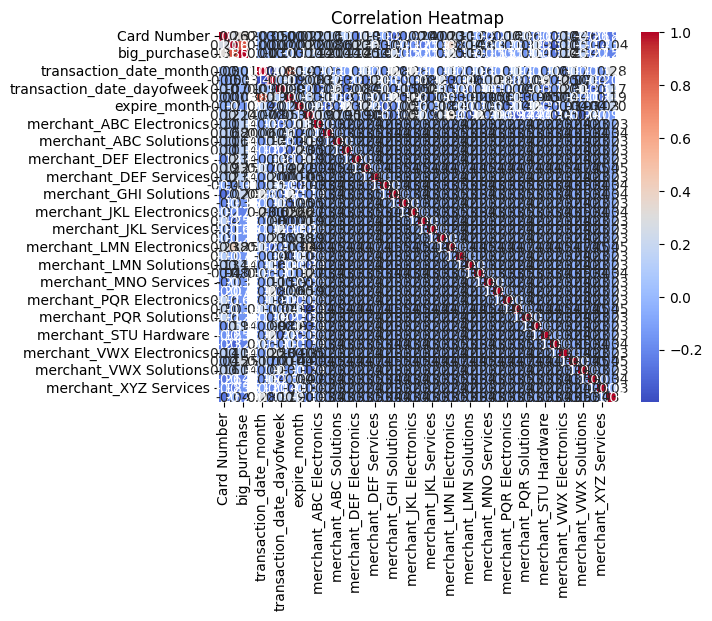

In [24]:
# Correlation heatmap
create_correlation_heatmap(df_clean)

## Machine Learning Models

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_data(df_clean, target)

In [17]:
# Random Forest Classifier as an example algorithm
model = train_classification_data(X_train, y_train)

In [18]:
# Predictions on the test set
y_pred = predict_data(model, X_test)

## Display Results

In [19]:
accuracy, conf_matrix, classification_rep = classification_model_evaluation(y_test, y_pred)

In [20]:
print("\nMachine Learning Model (Random Forest Classifier):")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Machine Learning Model (Random Forest Classifier):
Accuracy: 1.00

Confusion Matrix:
[[4 0]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

